In [1]:
# Import script untuk dataset dan model
from script import Dataset,Model

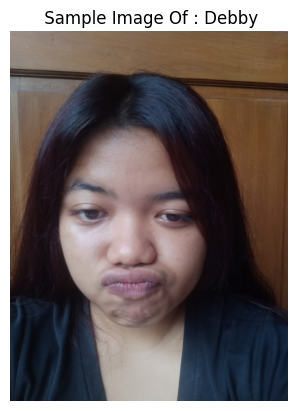

(4608, 3456, 3)


In [2]:
# Inisiaisasi dataset dan melihat sample gambar yang ada
size={'train':0.7,'validation':0.1,'test':0.2}
dataset=Dataset('../Data/',image_size=(80,80),size=size)
img=dataset.getSample()

In [3]:
# Generate dataset yang telah dilakukan preprocessing untuk mendapatkan data training dan testing
x_train,y_train,x_valid,y_valid,x_test,y_test=dataset.generateDataset()
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((873, 80, 80), (243, 80, 80), (873, 3), (243, 3))

In [4]:
import tensorflow as tf
#  Check if GPU is available and TensorFlow is using GPU
if tf.test.is_gpu_available():
    print("GPU is available")
    print("TensorFlow is using GPU")
else:
    print("GPU is not available")
    print("TensorFlow is using CPU")
    
# Create a TensorFlow session with GPU options
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available
TensorFlow is using GPU


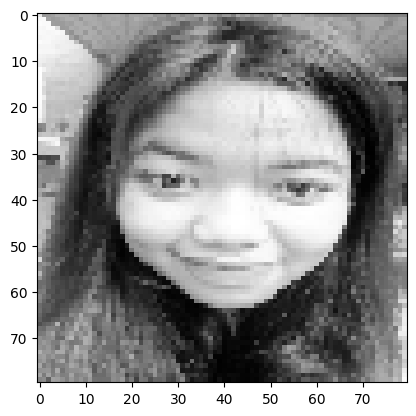

In [5]:
# Melihat Contoh gambar setelah dipreprocessing. Untuk melihat contoh lain, ganti index saja
import matplotlib.pyplot as plt
plt.imshow(x_train[14],cmap='gray')

# Training Model Menggunakan Data Latih dan Data Validasi Untuk Validasi Tiap Epoch

In [6]:
# Inisialisasi model dan melatih model menggunakan data sebelumnya
model=Model(label=dataset.idx_to_label)
model.trainModel(x_train,y_train,x_valid,y_valid,epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

# Pengujian Menggunakan Data Uji

In [12]:
# Mengevaluasi model setelah ditraining untuk mendapatkan akurasi pasti
model.evaluateModel(x_test,y_test)

8/8 [==============================] - 0s 16ms/step - loss: 0.1558 - accuracy: 0.9630


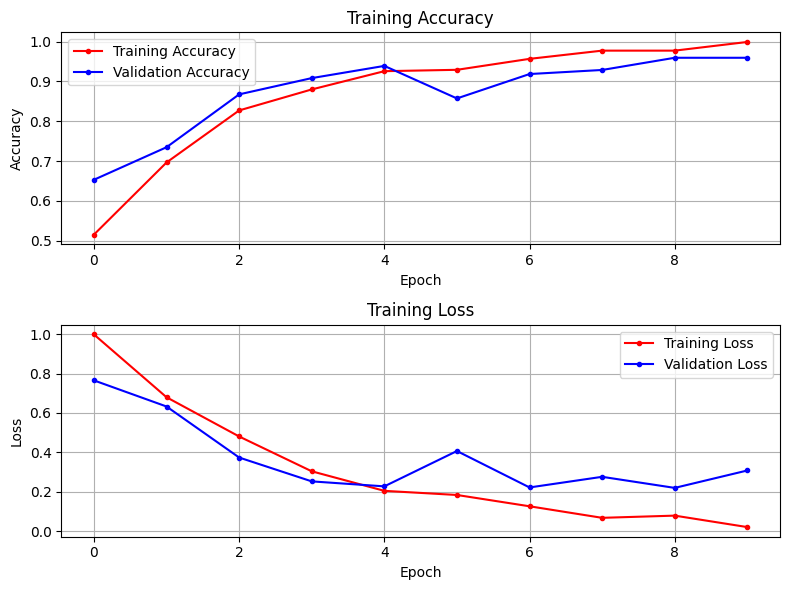

In [7]:
# Visualisasi hasil training model baik pada akurasi dan loss
model.plotTraining()

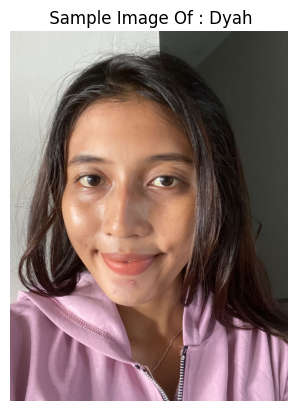

(1600, 1200, 3)


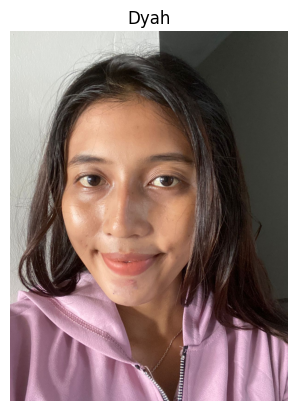

In [8]:
# Mencoba memprediksi model dengan data
model.predict(img=dataset.getSample())

In [23]:
# Melakukan real time prediksi
model.stream()